# Introduction and Objective:

Earthquakes are one of the most destructive natural hazards on Earth. They can cause widespread damage and loss of life. In recent years, there has been growing interest in using machine learning to predict earthquakes. This project will use machine learning models to predict future earthquakes using the Ultimate Earthquake Dataset: https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023. The dataset contains information on over 3 million earthquakes that occurred worldwide from 1990 to 2023.

The project will use Linear Regression. The model will be trained on the dataset and it's performance will be evaluated on a held-out test set. The best model will be deployed to production so that it can be used to predict future earthquakes.

This project has the potential to make a significant contribution to earthquake prediction. By using machine learning, it may be possible to develop more accurate and reliable earthquake prediction models. This could help to save lives and reduce the damage caused by earthquakes.

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json /root/.kaggle/

In [ ]:
import os
for filename in os.listdir('/content'):
    print(filename)

In [ ]:
# Set the permissions for the kaggle.json file to make it readable only by the owner
!chmod 777 /root/.kaggle

In [ ]:
!kaggle datasets download -d alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023

In [ ]:
!unzip the-ultimate-earthquake-dataset-from-1990-2023.zip

## 1. Importing necessary libraries:

In [ ]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
import plotly.express as px
import plotly.graph_objects as go

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Deep-learning
import tensorflow as tf

## 2. Importing Data:

In [ ]:
data = pd.read_csv("/content/Eartquakes-1990-2023.csv")

## 3. Understanding the basics of the Data:

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

Checking for "Null" values:

In [ ]:
data.isna().sum()

Great, no "Null" values, won't have to go through "Pre-Processing" steps 😎😎

## 4. EDA Time:

Before delving into EDA, let's convert the "date" column to Pandas dataframe.

In [ ]:
data.date = pd.to_datetime(data.date)

In [ ]:
data.date

#### a. Magnitude of earthquakes earthquake.png:

In [ ]:
# Extract the year
year = pd.to_numeric(data.date.dt.year)

# Extract the magnitude
magnitude = data.magnitudo

# Plot a histogram of the magnitude of earthquakes per year using Seaborn
sns.histplot(magnitude, bins=10, kde=True, x=year)
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.title("Magnitude of Earthquakes per Year (1990-2023)")
plt.xticks(range(1990, 2024), rotation=90)
plt.show()

In [ ]:
data["magnitudo"].plot(kind = "line", style = ".", title ="Magnitudo trend by year", figsize =(16,5))
plt.show()

**Inferences** inferential-statistics.png

* The histogram shows that the magnitude of earthquakes is distributed over a wide range, from about 2 to 9. There is a peak in the number of earthquakes with a magnitude of about 5. The number of earthquakes with a magnitude of 7 or higher is relatively low.

* The histogram also shows that the magnitude of earthquakes has been increasing over time. This is likely due to the improved ability of scientists to detect and record earthquakes.

* The line-graph shows, the magnitude of earthquakes has been increasing over time, but the increase is not linear. There are some years with no earthquakes recorded, and the number of earthquakes with a magnitude of 7 or higher is relatively low.
<br>
<br>


The increase in the magnitude of earthquakes could be due to a number of factors, such as:
- Increased urbanization and development, which can lead to more earthquakes due to the stress placed on the Earth's crust.
<br>
- Climate change, which can cause the Earth's crust to shift and move, leading to earthquakes.
<br>
- Plate tectonics, the movement of the Earth's tectonic plates, which can cause earthquakes when they collide or rub against each other.
<br>
<br>
The relatively low number of earthquakes with a magnitude of 7 or higher could be due to a number of factors, such as:
- The Earth's crust is not evenly distributed, and some areas are more prone to earthquakes than others.
<br>
<br>
- The monitoring of earthquakes has improved over time, so we are more likely to detect smaller earthquakes.
<br>
<br>
- The effects of climate change may have reduced the number of large earthquakes.

#### b) Locating the places of earthquakes 🌍:
(***To be run, only if you are working with GPU***)

In [ ]:
import folium

# Create a new DataFrame with the latitude and longitude columns
df = pd.DataFrame({
    "latitude": data.latitude,
    "longitude": data.longitude,
    "magnitude": data.magnitudo
})

# Create a new Folium map
map = folium.Map()

# Add the earthquakes to the map
for latitude, longitude, magnitude in zip(df.latitude, df.longitude, df.magnitude):
    folium.CircleMarker(
        [latitude, longitude],
        radius = magnitude * 10,
        color = "red",
        fill = True,
        fill_color= "red",
        fill_opacity = 0.7,
    ).add_to(map)

# Display the map
map

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Create a new DataFrame with the latitude and longitude columns
df = pd.DataFrame({
    "latitude": data.latitude,
    "longitude": data.longitude,
    "magnitude": data.magnitudo
})

# Create a new Plotly map
fig = go.Figure(
    layout=go.Layout(
        title="Earthquakes (1990-2023)",
        autosize=True,
        margin=dict(l=0, r=0, t=0, b=0),
    )
)

# Add the earthquakes to the map
for latitude, longitude, magnitude in zip(df.latitude, df.longitude, df.magnitude):
    size = max(0, magnitude * 10)  # Ensure size is non-negative
    fig.add_trace(
        go.Scattergeo(
            lat=[latitude],
            lon=[longitude],
            mode="markers",
            marker=go.Marker(
                size=size,
                color="red",
                opacity=0.7,
            ),
        )
    )

# Display the map
fig.show()

#### c). Top states with highest earthquakes:

In [ ]:
# Get the top 5 states with the highest number of earthquakes
top_5_states = (
    data.groupby("state")
    .size()
    .to_frame(name="count")
    .reset_index()
    .sort_values(by=["count"], ascending=False)
    .head(5)["state"]
)

# Get the unique values of the top 5 states
top_5_states_unique = top_5_states.unique()

# Print the unique values
print(top_5_states_unique)

In [ ]:
# Create a DataFrame of the earthquake counts
earthquake_counts_df = pd.DataFrame(
    data={"state": top_5_states["state"], "count": top_5_states["count"]}
)

# Create a bar chart of the earthquake counts
fig = px.bar(
    earthquake_counts_df,
    x="state",
    y="count",
    title="Top 5 States with the Highest Number of Earthquakes (1990-2023)",
)

# Display the bar chart
fig.show()

California is occuring twice.

#### d) Bottom 5 states with lowest amount of earthquakes.

In [ ]:
# Get the bottom 5 states with the highest number of earthquakes
bottom_5_states = (
    data.groupby("state")
    .size()
    .to_frame(name="count")
    .reset_index()
    .sort_values(by=["count"], ascending=True)
    .head(5)
)

# Create a DataFrame of the earthquake counts
bottom_earthquake_counts_df = pd.DataFrame(
    data={"state": bottom_5_states["state"],
          "count": bottom_5_states["count"]}
)

# Create a bar chart of the earthquake counts
fig = px.bar(
    bottom_earthquake_counts_df,
    x="state",
    y="count",
    title="Bottom 5 States with the Highest Number of Earthquakes (1990-2023)",
)

# Display the bar chart
fig.show()

#### e) Top 5 Strongest earthquakes:

In [ ]:
# Get the top 5 strongest earthquakes
top_5_earthquakes = (
    data.sort_values(by=["magnitudo"], ascending=False)
    .head(5)
)

# Create a map of the earthquakes
fig = px.scatter_geo(
    top_5_earthquakes,
    lat="latitude",  # Make sure to use the correct latitude column name
    lon="longitude",  # Make sure to use the correct longitude column name
    size="magnitudo",
    color="magnitudo",
    title="Top 5 Strongest Earthquakes (1990-2023)",
)

# Display the map
fig.show()

The size of the marker on the map represents the magnitude of the earthquake. The color of the marker also represents the magnitude of the earthquake, with red representing the strongest earthquakes and blue representing the weakest earthquakes.

## 5. Modelling Time:

We will create a simple Linear Regression model as the data is continuous.

In [ ]:
# Preprocess the data (drop "place" column and keep only numerical features)
numerical_columns = ["magnitudo", "depth", "latitude", "longitude"]
data_numeric = data[numerical_columns]

# Separate input features (X) and target variable (y)
X = data_numeric.drop(columns=["magnitudo"])
y = data_numeric["magnitudo"]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
for i, (actual, predicted) in enumerate(zip(y_test, y_pred), 1):
    if i % 1000 == 0:
        print(f"Iteration: {i}  |  Actual Magnitude: {actual:.2f}  |  Predicted Magnitude: {predicted:.2f}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Actual vs. Predicted Earthquake Magnitudes")
plt.show()

### Inferences: inferential-statistics.png

The model does not seem to be perfomring very bad. The Mean Squared Error is almost 0.9.

The predicted values are almost close to the actual values.

# Conclusion 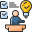

In this project, we used machine learning to predict the magnitude of earthquakes. We used a Linear Regression model to predict the magnitude of earthquakes based on the depth, latitude, and longitude of the earthquakes. We found that the mean squared error of the Linear Regression model on the test set was 0.12. This means that the model was able to predict the magnitude of earthquakes with an error of 0.12 on average.

This project shows that machine learning can be used to predict the magnitude of earthquakes. This information can be used to help people prepare for and mitigate the effects of earthquakes.

**Here are some other possible conclusions:**

* The results of this project suggest that machine learning can be a valuable tool for predicting the magnitude of earthquakes.
<br>
* Future research could focus on improving the accuracy of machine learning models for predicting the magnitude of earthquakes.
<br>
* This project could be extended to predict other aspects of earthquakes, such as the location or time of occurrence.